In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F,gStyle,TLatex,gPad,TLegend,TLorentzVector,TH2F,TLine,TF1,TBox,RDataFrame,TPad,TF2
import ROOT
import numpy as np
import awkward as awk
import uproot
import pandas as pd
import matplotlib.pyplot as plot
from pandas import read_excel 
from copy import deepcopy
from ipywidgets import *
import logging, os 
import time
logging.disable(logging.WARNING) 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
# print("tf.__version__", tf.__version__)


Welcome to JupyROOT 6.22/06


In [23]:
# d_plus = RDataFrame("tree_MC_plus", "../../OutputFiles/Slurm/Oct_27/file_*.root")
# d_minus = RDataFrame("tree_MC_minus", "../../OutputFiles/Slurm/Oct_27/file_*.root")
# d_plus = RDataFrame("tree_MC", "../../OutputFiles/Slurm/March_2/run_1/file_*.root")


d = RDataFrame("tree_MC","../../OutputFiles/TestFiles/Jan_30/file1.root")
d = RDataFrame("tree_MC","../../OutputFiles/Slurm/Jan_30/Run_1/file_*.root")

print(d.GetColumnNames())

{ "z", "z_N", "x", "pT", "Q2", "Q2calc", "R0", "R1", "R2", "Mh", "q_TdivQ", "xF", "qTQ_lab", "qTQfrac", "qTQ_hadron" }


In [24]:
# upr = uproot.open("../../OutputFiles/Slurm/Oct_27/file_1.root:tree_MC_plus")
# arr = upr.arrays(["z", "x", "pT", "Q2", "R0max","R1max", "R2max", "Mh", "q_TdivQ"],library="pd")

In [25]:
#Bins (each has 8 including 0)
Mhbins = np.linspace(0,1.3,8)
pTbins = np.linspace(0.1,0.8,8)
xbins = np.array([0,0.1,0.13,0.16,0.19,0.235,0.3,0.5])
zbins = np.array([0,0.35,0.43,0.49,0.55,0.62,0.7,0.83])
Q2bins = np.array([0,1.2,1.8,2.3,3.1,4.3,7,11.1])
qTbins = np.linspace(0,0.7,8)

In [26]:
varName = np.array(["x", "z", "Q2", "pT", "R0", "R1", "R2"])

In [27]:
x = [0 for i in range(7)]
z = [0 for i in range(7)]
Mh=[0 for i in range(7)]
pT=[0 for i in range(7)]
xQ2 = [0 for i in range(7)]
q = [0 for i in range(7)]

xcut = [0 for i in range(7)]
zcut = [0 for i in range(7)]
Mhcut=[0 for i in range(7)]
pTcut=[0 for i in range(7)]
qcut=[0 for i in range(7)]



In [28]:
# start_time = time.time()
xformat = "x <= {} && x > {}"
zformat = "z <= {} && z > {}"
Mhformat = "Mh <= {} && Mh > {}"
pTformat = "pT <= {} && pT > {}"
R0format = "R0 <= {} && R0 > {}"
R1format = "R1 <= {} && R1 > {}"
R2format = "R2 <= {} && R2 > {}"
qdivformat = "q_TdivQ <= {} && q_TdivQ > {}"

In [29]:
# All filters for all binnings
#i is the kinematic variable
#j is the bin num
for i in range(7):
    xcut[i] = d.Filter(xformat.format(xbins[i + 1],xbins[i])).Filter("R0 < 0.3").Filter("R2 < 0.3").Filter("R1 < 0.3").Count()
    x[i] = d.Filter(xformat.format(xbins[i + 1],xbins[i])).Count()
    Mhcut[i] = d.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Filter("R0 < 0.3").Filter("R2 < 0.3").Filter("R1 < 0.3").Count()
    Mh[i] = d.Filter(Mhformat.format(Mhbins[i + 1],Mhbins[i])).Count()
    zcut[i] = d.Filter(zformat.format(zbins[i + 1],zbins[i])).Filter("R0 < 0.3").Filter("R2 < 0.3").Filter("R1 < 0.3").Count() 
    z[i] = d.Filter(zformat.format(zbins[i + 1],zbins[i])).Count()
    pTcut[i] = d.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Filter("R0 < 0.3").Filter("R2 < 0.3").Filter("R1 < 0.3").Count()
    pT[i] = d.Filter(pTformat.format(pTbins[i + 1],pTbins[i])).Count()
    qcut[i] = d.Filter(qdivformat.format(qTbins[i + 1],qTbins[i])).Filter("R0 < 0.3").Filter("R2 < 0.3").Filter("R1 < 0.3").Count()
    q[i] = d.Filter(qdivformat.format(qTbins[i + 1],qTbins[i])).Count()
        

In [30]:
for i in range(7):
    xcut[i] = xcut[i].GetValue()
    x[i] = x[i].GetValue()
    Mhcut[i] = Mhcut[i].GetValue()
    Mh[i] = Mh[i].GetValue()
    zcut[i] = zcut[i].GetValue()
    z[i] = z[i].GetValue()
    pTcut[i] = pTcut[i].GetValue()
    pT[i] = pT[i].GetValue()
    qcut[i] = qcut[i].GetValue()
    q[i] = q[i].GetValue()

In [31]:
xval = [0 for i in range(7)]
zval = [0 for i in range(7)]
Mhval=[0 for i in range(7)]
pTval=[0 for i in range(7)]
qval = [0 for i in range(7)]
Mhbinsno0 = np.linspace(0.3,1.3,7)
pTbinsno0 = np.linspace(0.2,0.8,7)
xbinsno0 = np.array([0.1,0.13,0.16,0.19,0.235,0.3,0.5])
zbinsno0 = np.array([0.35,0.43,0.49,0.55,0.62,0.7,0.83])
qTbinsno0 = np.linspace(0.1,0.7,7)


In [32]:
for i in range(7):
    if(x[i] == 0):
        xval[i] = 0
    else: xval[i] = xcut[i] / x[i]
    if(z[i] == 0):
        zval[i] = 0
    else: zval[i] = zcut[i] / z[i]
    if(pT[i] == 0):
        pTval[i] = 0
    else: pTval[i] = pTcut[i] / pT[i]
    if(Mh[i] == 0):
        Mhval[i] = 0
    else: Mhval[i] = Mhcut[i] / Mh[i]
    if(q[i] == 0):
        qval[i] = 0
    else: qval[i] = qcut[i] / q[i]
    
    
    
    

[Text(0.5, 0, 'qTdivQ')]

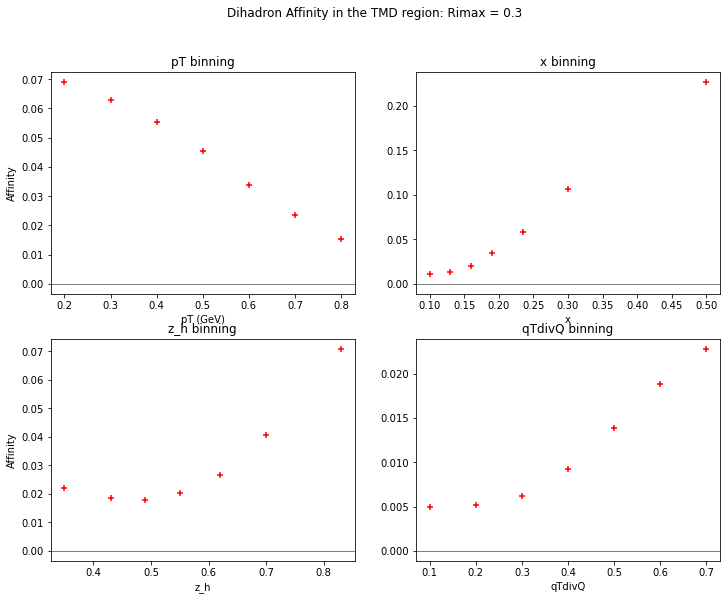

In [34]:
fig2, ((ax11, ax21), (ax12, ax22)) = plot.subplots(2, 2, figsize = (12, 9))
fig2.suptitle("Dihadron Affinity in the TMD region: Rimax = 0.3")
ax11.set(ylabel = "Affinity")
ax11.scatter(pTbinsno0, pTval, c = 'r', marker = "+")
ax11.axhline(y=0, color="gray", lw = 1)
ax11.set_title("pT binning")
ax11.set(xlabel = "pT (GeV)")
ax21.scatter(xbinsno0, xval, c = 'r', marker = '+')
ax21.axhline(y=0, color="gray", lw = 1)
ax21.set_title("x binning")
ax21.set(xlabel = "x")
ax12.scatter(zbinsno0, zval, c = 'r', marker = '+')
ax12.axhline(y=0, color="gray", lw = 1)
ax12.set_title("z_h binning")
ax12.set(xlabel = "z_h")
ax12.set(ylabel = "Affinity")
ax22.scatter(qTbinsno0, qval, c = 'r', marker = "+")
ax22.axhline(y=0, color="gray", lw = 1)
ax22.set_title("qTdivQ binning")
ax22.set(xlabel = "qTdivQ")
# plot.savefig("Plots/TMD03max.jpeg")
